# Building a deep belief network

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

import sys
sys.path.append('../..')

from logger import setup_logging
from models import DBN
from utils import (
    dataset,
    test,
    train,
    utils,
    visualisation
)

D:\anaconda3\envs\dbn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LOG_CONFIG_PATH = os.path.join(os.path.abspath("../.."), "logger", "logger_config.json")
LOG_DIR   = os.path.join(os.path.abspath("../.."), "logs")
DATA_DIR  = os.path.join(os.path.abspath("../.."), "data")
IMAGE_DIR = os.path.join(os.path.abspath("../.."), "images")

Check if GPU is active.

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [4]:
utils.mkdir(LOG_DIR)
setup_logging(save_dir=LOG_DIR, log_config=LOG_CONFIG_PATH)

### Create the DataLoader

In [5]:
# Get the datasets
train_data, val_data, test_data = dataset.get_dataset(data_path=DATA_DIR, balanced=False)

# How many instances have we got?
print('# instances in training set: ', len(train_data))
print('# instances in validation set: ', len(val_data))
print('# instances in testing set: ', len(test_data))

samples_weight = utils.get_samples_weight(train_data.labels['label'])
sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

batch_size = 128

# Create the dataloaders - for training, validation and testing
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, sampler=sampler)
valid_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# instances in training set:  1455436
# instances in validation set:  485146
# instances in testing set:  485145


### Instantiate the network, the loss function and the optimizer

In [7]:
# Defining some input variables
n_classes = 7
num_epochs = 3

# Creating a DBN
model = DBN(n_visible=49,
            n_hidden=(128, 128),
            k=(1, 1),
            learning_rate=(0.1, 0.1),
            momentum=(0, 0),
            decay=(0, 0), 
            batch_size=[64, 64],
            num_epochs=[5, 5],
            device=device)

# Training a DBN
model.fit(train_loader)

# Creating the optimzers
optimizer = [optim.Adam(m.parameters(), lr=0.001) for m in model.models]
optimizer.append(optim.Adam(model.fc.parameters(), lr=0.001))

INFO 2023-06-13 12:12:08,114 | DBN.py:184 | Fitting layer 1/2


100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [05:09<00:00, 36.78it/s]

INFO 2023-06-13 12:17:17,258 | RBM.py:269 | Epoch 1/5 - MSE: 6.261292457580566 - Pseudo-Likelihood: -11.446664810180664



100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [05:07<00:00, 36.98it/s]

INFO 2023-06-13 12:22:24,745 | RBM.py:269 | Epoch 2/5 - MSE: 5.612484455108643 - Pseudo-Likelihood: -10.495657920837402



100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [05:10<00:00, 36.63it/s]

INFO 2023-06-13 12:27:35,190 | RBM.py:269 | Epoch 3/5 - MSE: 5.512579917907715 - Pseudo-Likelihood: -10.388805389404297



100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [05:10<00:00, 36.68it/s]

INFO 2023-06-13 12:32:45,199 | RBM.py:269 | Epoch 4/5 - MSE: 5.445291996002197 - Pseudo-Likelihood: -10.303130149841309



100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [05:12<00:00, 36.39it/s]

INFO 2023-06-13 12:37:57,703 | RBM.py:269 | Epoch 5/5 - MSE: 5.385626316070557 - Pseudo-Likelihood: -10.245720863342285


INFO 2023-06-13 12:37:59,559 | DBN.py:184 | Fitting layer 2/2


100%|███████████████████████████████████████████████████████████████████████████| 22742/22742 [01:19<00:00, 285.26it/s]

INFO 2023-06-13 12:39:19,288 | RBM.py:269 | Epoch 1/5 - MSE: 16.111331939697266 - Pseudo-Likelihood: -29.47169303894043



100%|███████████████████████████████████████████████████████████████████████████| 22742/22742 [01:19<00:00, 287.23it/s]

INFO 2023-06-13 12:40:38,468 | RBM.py:269 | Epoch 2/5 - MSE: 15.79285717010498 - Pseudo-Likelihood: -29.4810733795166



100%|███████████████████████████████████████████████████████████████████████████| 22742/22742 [01:16<00:00, 298.01it/s]

INFO 2023-06-13 12:41:54,782 | RBM.py:269 | Epoch 3/5 - MSE: 15.74740982055664 - Pseudo-Likelihood: -29.419795989990234



100%|███████████████████████████████████████████████████████████████████████████| 22742/22742 [01:19<00:00, 287.71it/s]

INFO 2023-06-13 12:43:13,829 | RBM.py:269 | Epoch 4/5 - MSE: 15.733292579650879 - Pseudo-Likelihood: -29.420743942260742



100%|███████████████████████████████████████████████████████████████████████████| 22742/22742 [01:04<00:00, 354.80it/s]

INFO 2023-06-13 12:44:17,929 | RBM.py:269 | Epoch 5/5 - MSE: 15.723857879638672 - Pseudo-Likelihood: -29.452306747436523


In [8]:
print(model)

DBN(
  (fc): Linear(in_features=128, out_features=7, bias=True)
)


In [10]:
criterion = nn.CrossEntropyLoss()

### Train it

In [11]:
history = train(model, criterion, optimizer, train_loader, valid_loader, num_epochs, device)

training_loss = history['train']['loss']
training_accuracy = history['train']['accuracy']
train_output_true = history['train']['output_true']
train_output_pred = history['train']['output_pred']

validation_loss = history['valid']['loss']
validation_accuracy = history['valid']['accuracy']
valid_output_true = history['valid']['output_true']
valid_output_pred = history['valid']['output_pred']

INFO 2023-06-13 16:11:17,075 | train.py:80 | Epoch 1/3:


100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [04:10<00:00, 45.34it/s]


INFO 2023-06-13 16:16:43,767 | train.py:153 | loss: 0.07950373647897961 - acc: 0.9783638717195398 - val_loss: 0.13195899617428314 - val_acc: 0.9619145576795439
INFO 2023-06-13 16:16:43,768 | train.py:80 | Epoch 2/3:


100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [04:05<00:00, 46.23it/s]


INFO 2023-06-13 16:22:04,936 | train.py:153 | loss: 0.026733381332817188 - acc: 0.9926750472023503 - val_loss: 0.0868270301671208 - val_acc: 0.9675953218206478
INFO 2023-06-13 16:22:04,937 | train.py:80 | Epoch 3/3:


100%|████████████████████████████████████████████████████████████████████████████| 11371/11371 [04:05<00:00, 46.26it/s]


INFO 2023-06-13 16:27:26,522 | train.py:153 | loss: 0.02327120849403033 - acc: 0.9933744939660692 - val_loss: 0.10911065197880919 - val_acc: 0.9660514566748979
INFO 2023-06-13 16:27:26,523 | train.py:155 | Finished Training


### Plot loss vs iterations

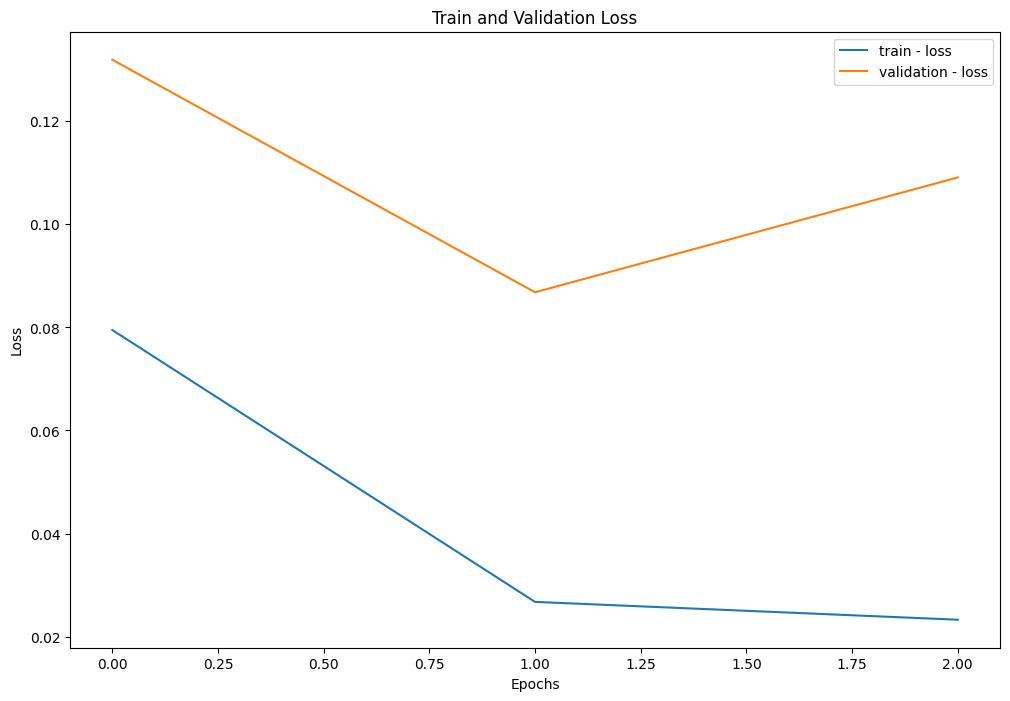

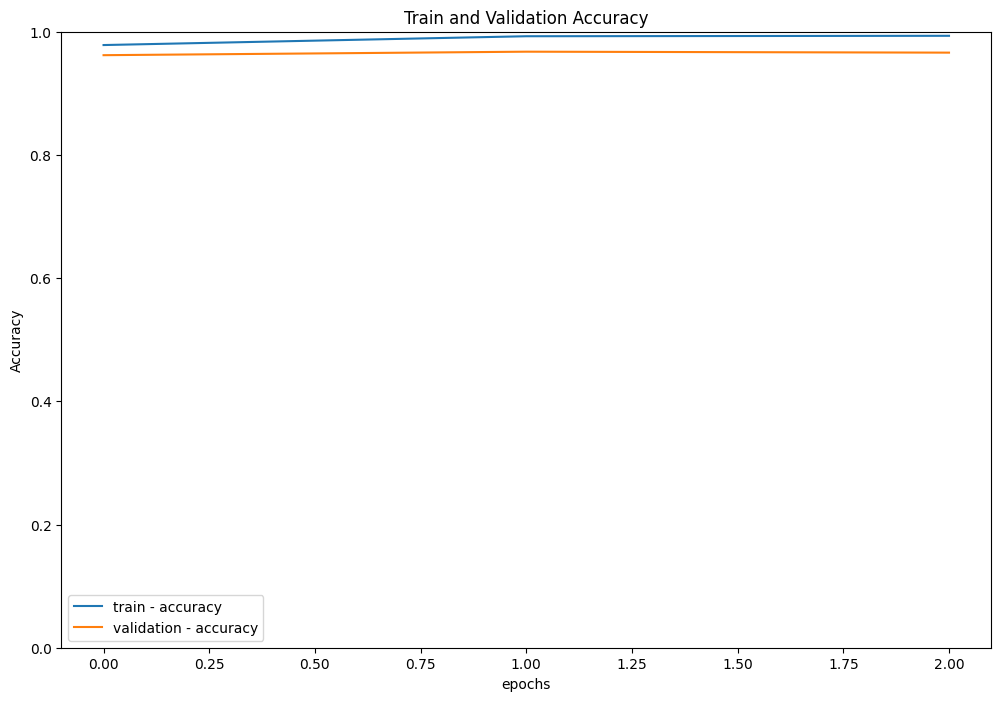

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.plot(training_loss, label='train - loss')
plt.plot(validation_loss, label='validation - loss')
plt.title("Train and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

fig = plt.figure(figsize=(12, 8))
plt.plot(training_accuracy, label='train - accuracy')
plt.plot(validation_accuracy, label='validation - accuracy')
plt.title("Train and Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc="best")
plt.show()

### Plot confusion matrix

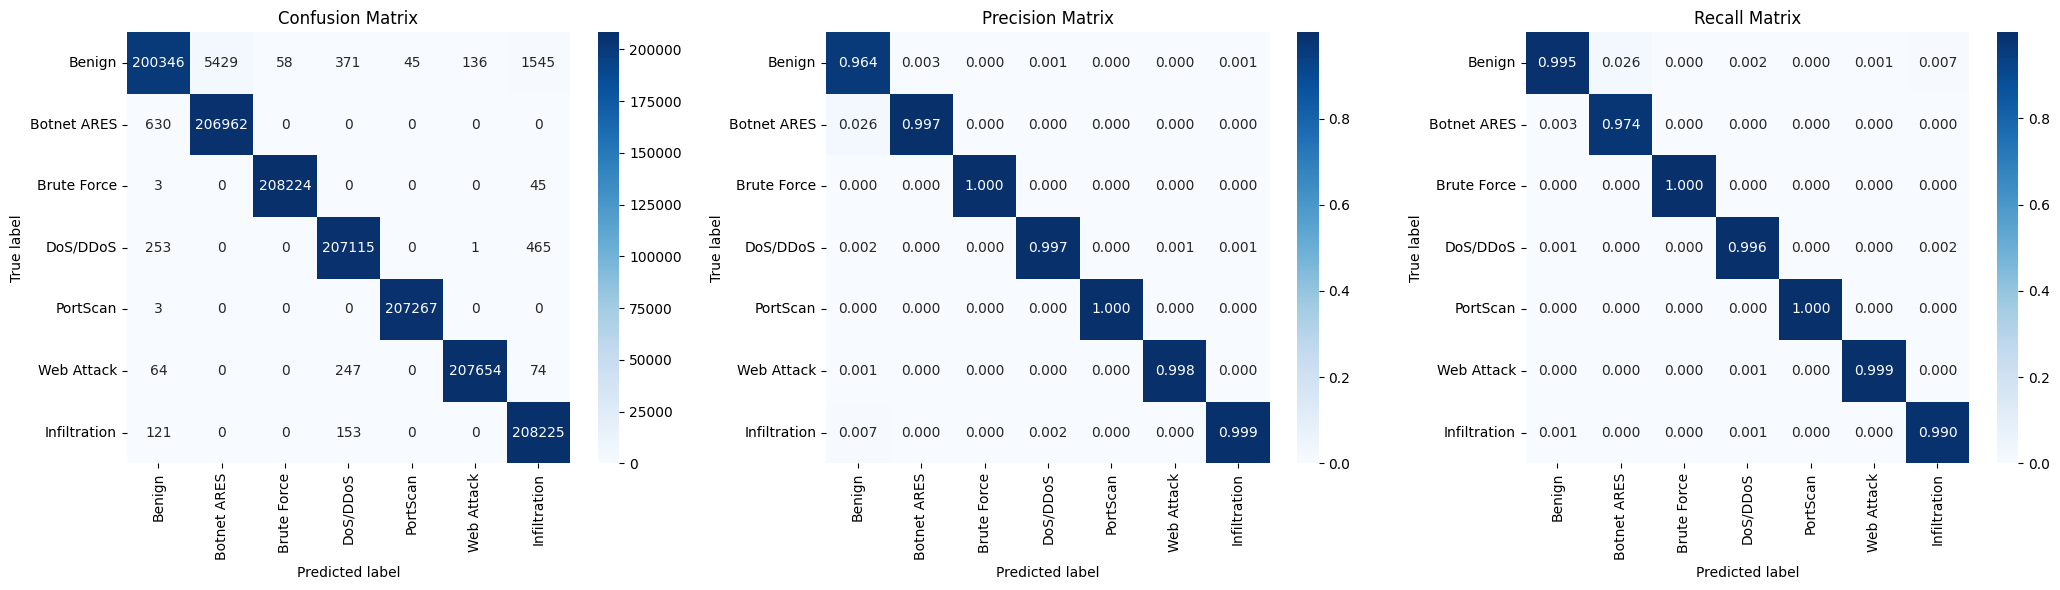

In [13]:
labels = ['Benign', 'Botnet ARES', 'Brute Force', 'DoS/DDoS', 'PortScan', 'Web Attack', 'Infiltration']

visualisation.plot_confusion_matrix(y_true=train_output_true,
                                    y_pred=train_output_pred,
                                    labels=labels,
                                    save=True,
                                    save_dir=IMAGE_DIR,
                                    filename="wrs_dbn_train_confusion_matrix.pdf")

In [14]:
from sklearn.metrics import classification_report

print("Training Set -- Classification Report", end="\n\n")
print(classification_report(train_output_true, train_output_pred, target_names=labels))

Training Set -- Classification Report

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.98    207930
 Botnet ARES       0.97      1.00      0.99    207592
 Brute Force       1.00      1.00      1.00    208272
    DoS/DDoS       1.00      1.00      1.00    207834
    PortScan       1.00      1.00      1.00    207270
  Web Attack       1.00      1.00      1.00    208039
Infiltration       0.99      1.00      0.99    208499

    accuracy                           0.99   1455436
   macro avg       0.99      0.99      0.99   1455436
weighted avg       0.99      0.99      0.99   1455436



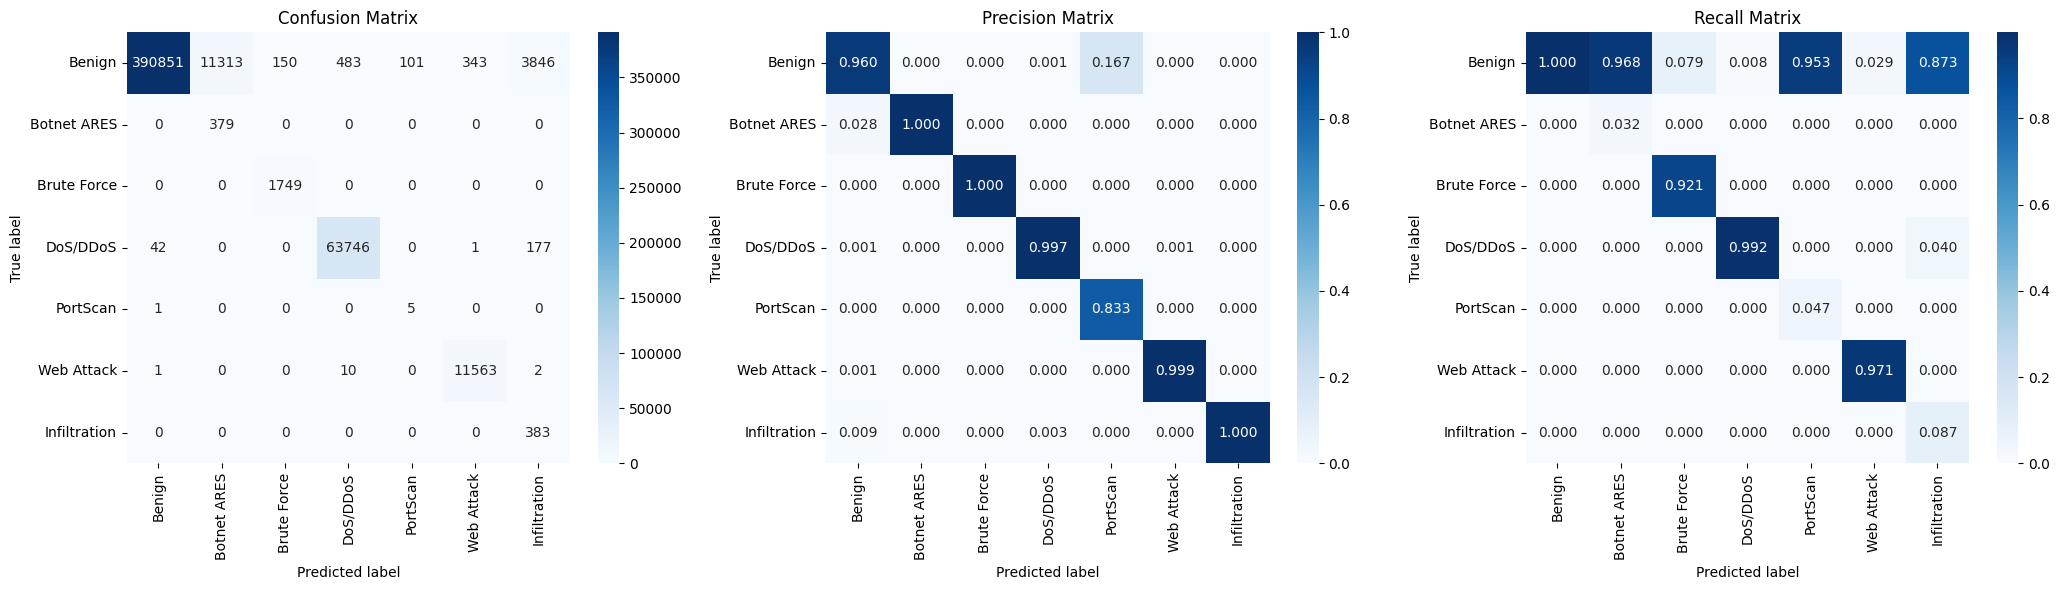

In [15]:
visualisation.plot_confusion_matrix(y_true=valid_output_true,
                                    y_pred=valid_output_pred,
                                    labels=labels,
                                    save=True,
                                    save_dir=IMAGE_DIR,
                                    filename="wrs_dbn_valid_confusion_matrix.pdf")

In [16]:
print("Validation Set -- Classification Report", end="\n\n")
print(classification_report(valid_output_true, valid_output_pred, target_names=labels))

Validation Set -- Classification Report

              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98    407087
 Botnet ARES       0.03      1.00      0.06       379
 Brute Force       0.92      1.00      0.96      1749
    DoS/DDoS       0.99      1.00      0.99     63966
    PortScan       0.05      0.83      0.09         6
  Web Attack       0.97      1.00      0.98     11576
Infiltration       0.09      1.00      0.16       383

    accuracy                           0.97    485146
   macro avg       0.58      0.97      0.60    485146
weighted avg       1.00      0.97      0.98    485146



### Test it

In [17]:
#################
### TEST LOOP ###
#################
history = test(model, criterion, test_loader, device)

test_output_true = history['test']['output_true']
test_output_pred = history['test']['output_pred']
test_output_pred_prob = history['test']['output_pred_prob']

100%|██████████████████████████████████████████████████████████████████████████████| 3791/3791 [01:18<00:00, 48.47it/s]

INFO 2023-06-13 16:30:31,370 | test.py:82 | Test loss: 0.10931840131669279, Test accuracy: 0.965888548784384


### Classification Report

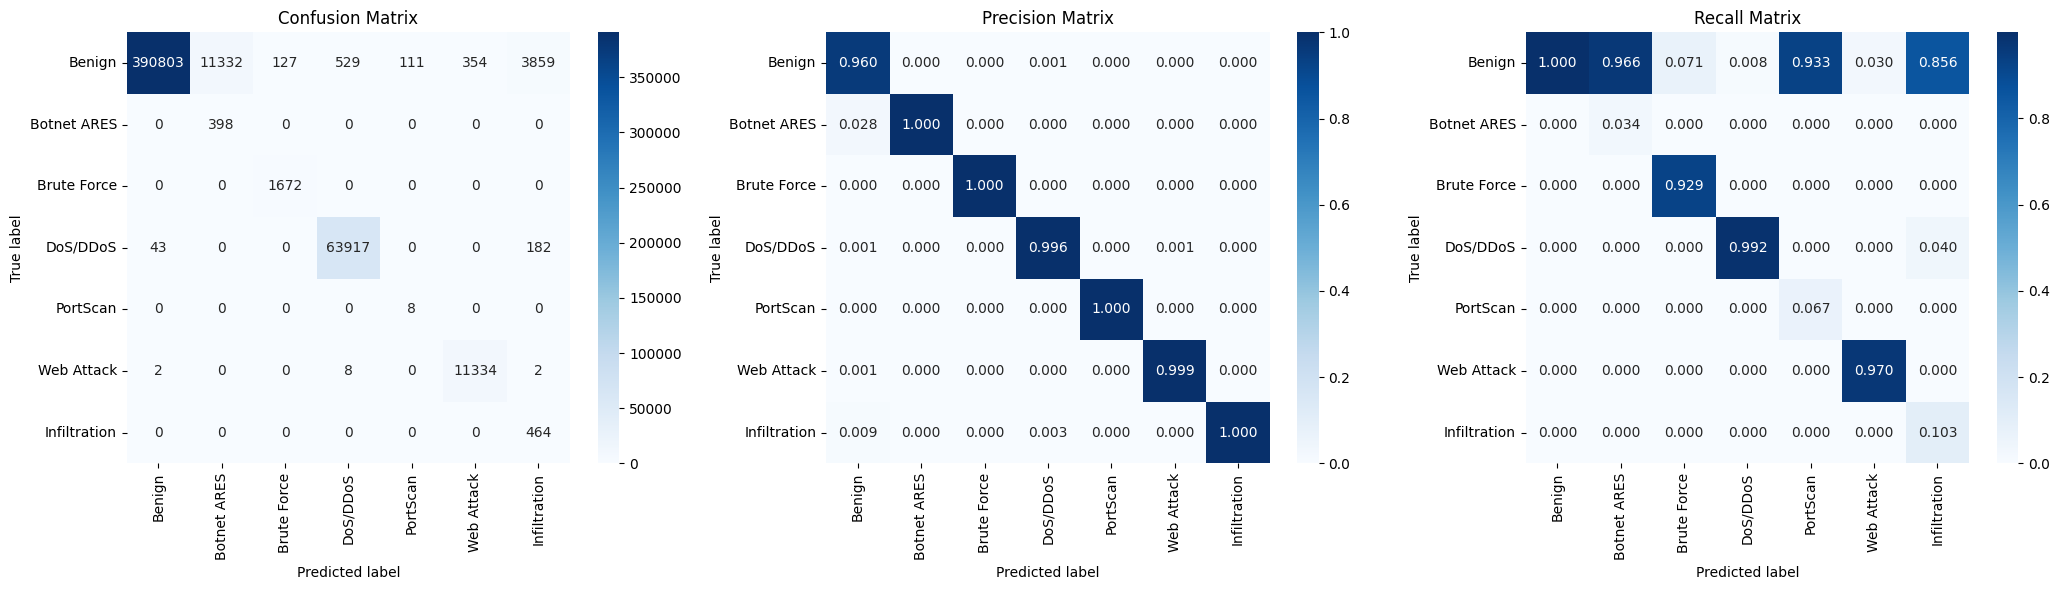

In [18]:
visualisation.plot_confusion_matrix(y_true=test_output_true,
                                    y_pred=test_output_pred,
                                    labels=labels,
                                    save=True,
                                    save_dir=IMAGE_DIR,
                                    filename="wrs_dbn_test_confusion_matrix.pdf")

In [19]:
print("Testing Set -- Classification Report", end="\n\n")
print(classification_report(test_output_true, test_output_pred, target_names=labels))

Testing Set -- Classification Report

              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98    407115
 Botnet ARES       0.03      1.00      0.07       398
 Brute Force       0.93      1.00      0.96      1672
    DoS/DDoS       0.99      1.00      0.99     64142
    PortScan       0.07      1.00      0.13         8
  Web Attack       0.97      1.00      0.98     11346
Infiltration       0.10      1.00      0.19       464

    accuracy                           0.97    485145
   macro avg       0.58      0.99      0.61    485145
weighted avg       1.00      0.97      0.98    485145



### Plot ROC curve

In [20]:
y_test = pd.get_dummies(test_output_true).values
y_score = np.array(test_output_pred_prob)

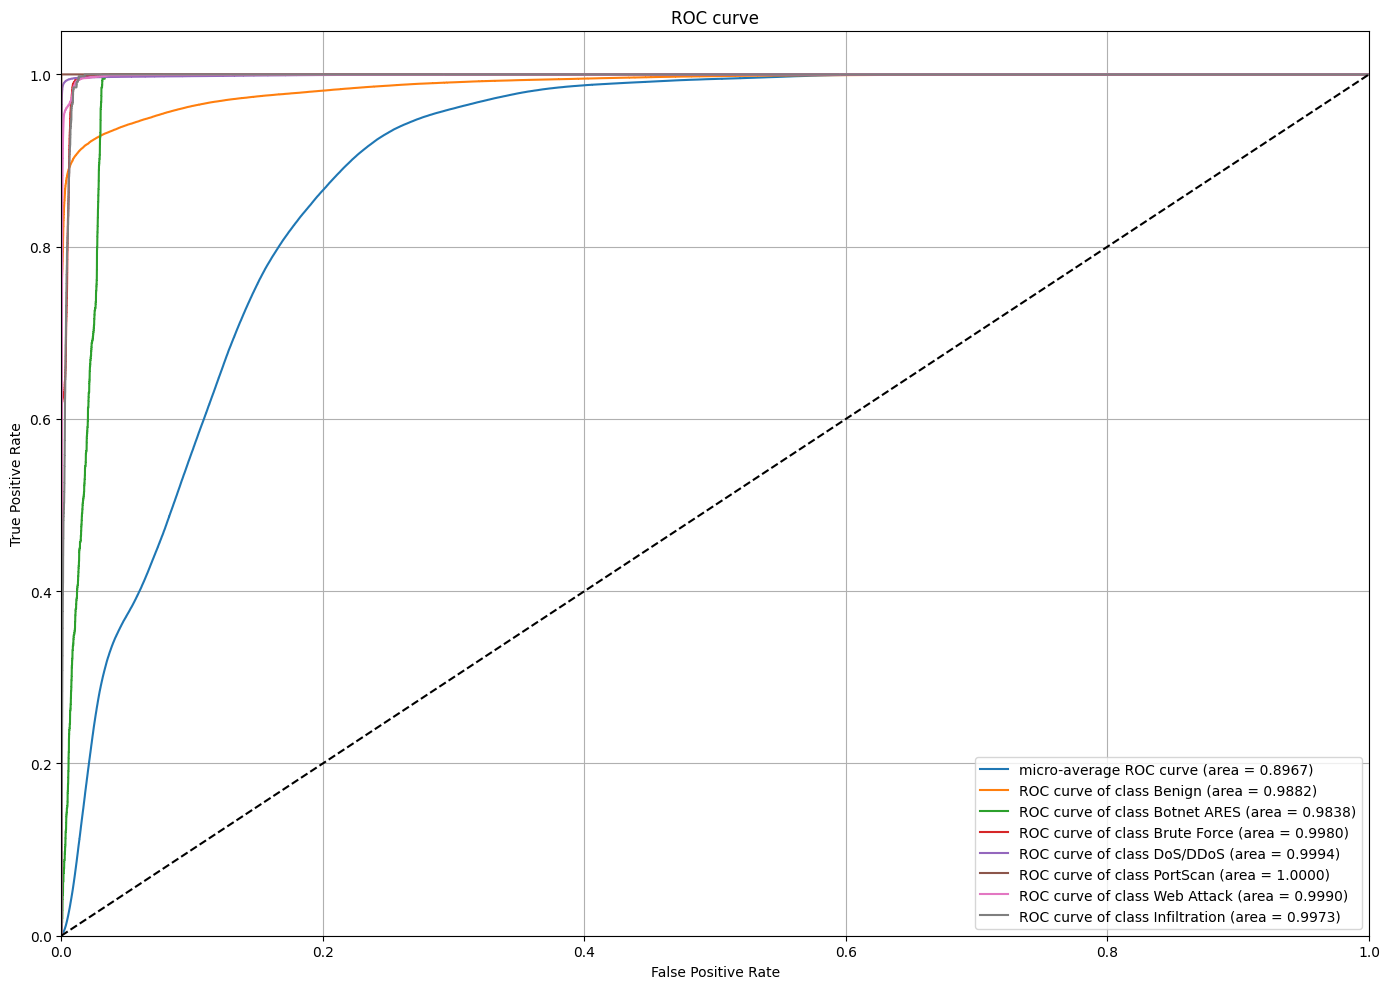

In [21]:
visualisation.plot_roc_curve(y_test=y_test,
                             y_score=y_score,
                             labels=labels,
                             save=True,
                             save_dir=IMAGE_DIR,
                             filename="wrs_dbn_roc_curve.pdf")

### Plot Precision vs. Recall curve

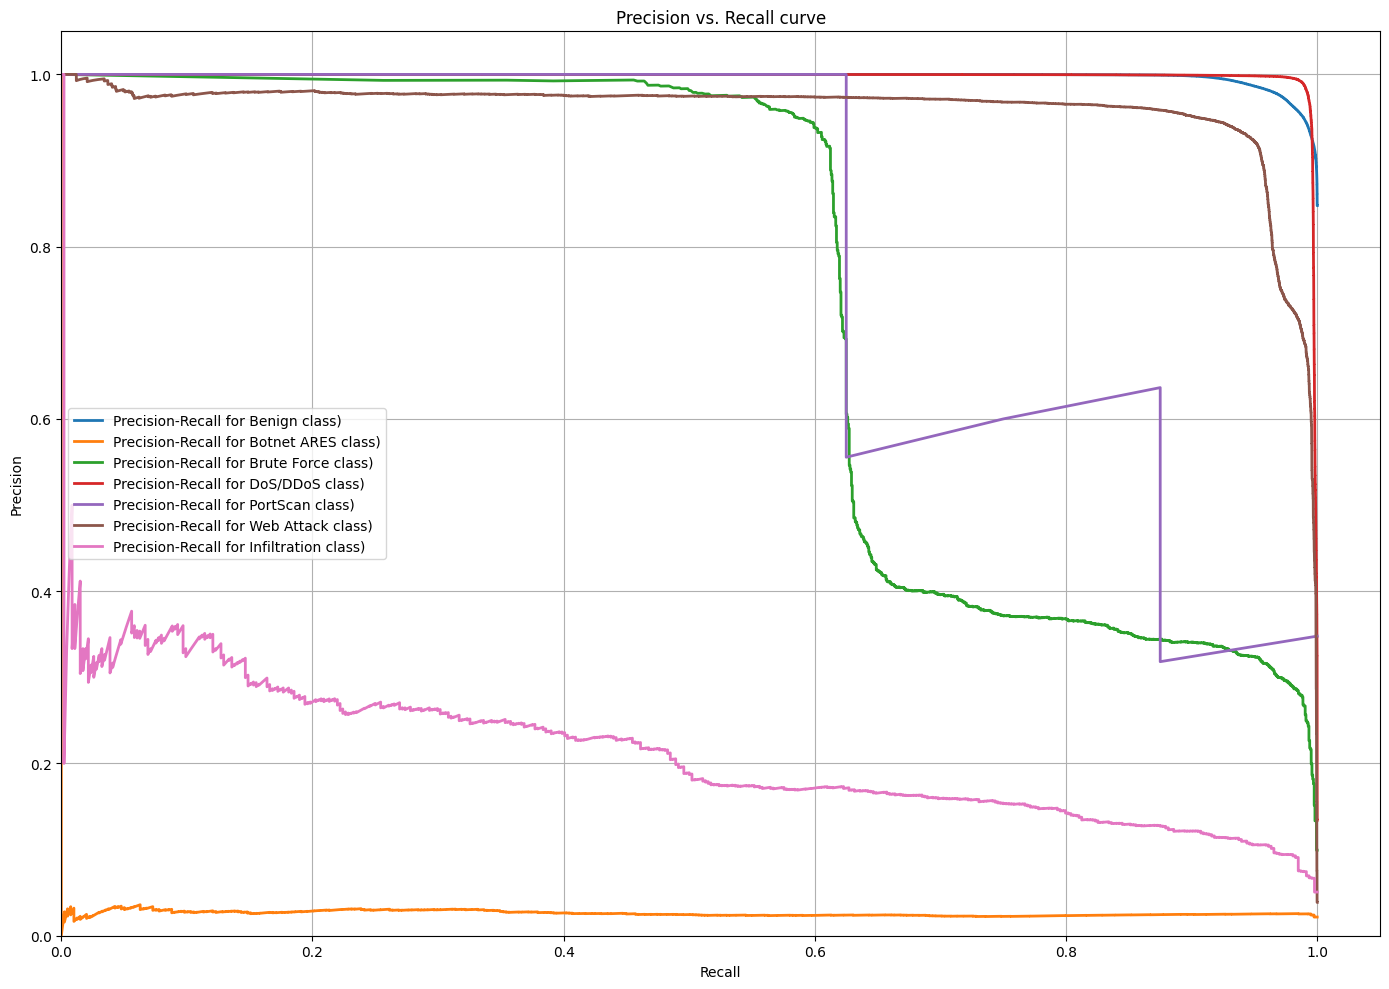

In [22]:
visualisation.plot_precision_recall_curve(y_test=y_test,
                                          y_score=y_score,
                                          labels=labels,
                                          save=True,
                                          save_dir=IMAGE_DIR,
                                          filename="wrs_dbn_prec_recall_curve.pdf")

### Save Model

In [ ]:
path = '../../checkpoints/wrs_deep_belief_network.pt'
torch.save({
            'epoch': num_epochs,
            'model_state_dict': model.state_dict(),
            }, path)